In [32]:
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.formula.api as sm
import numpy as np
    
import matplotlib.pyplot as plt

In [56]:
def check_assumptions(df,var):
    # Gettin summary statistics
    print(rp.summary_cont(df[var]))
    # Build ANOVA model 
    ols_resid = sm.ols(var+'~ group',data = df).fit()
    # Test assumption of normality for residuals 
    print(stats.shapiro(ols_resid.resid))
    # Test homogeneity of Variance test
    print(stats.levene(df[var][df['group'] == 'tg'], df[var][df['group'] == 'wt']))
    # Given Residuals were not normally distributed, run a Kruskal-Wallis test 
    print(stats.kruskal(df[var][df['group'] == 'tg'], df[var][df['group'] == 'wt']))

## Load general locomotion data and filter to day 1

In [31]:
# Loading data
data_path = r'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path + 'general_locomotion.csv')
df = df[df.day=='D1']
df


,subID,group,day,path_length,median_velocity,median_abs_acceleration,median_abs_angular_velocity,search_area,thigmotaxis
0,Tg102_D1,tg,D1,2863.691398,4.315799,13.456118,21.849311,0.123292,37.933333
2,Tg103_D1,tg,D1,2577.246876,4.303752,13.776957,6.687920,0.035592,342.733333
4,Tg104_D1,tg,D1,2571.390321,4.250983,13.196852,7.470793,0.074317,1774.233333
6,Tg105_D1,tg,D1,4231.298992,4.649838,14.660602,6.847991,0.052392,70.033333
8,Tg106_D1,tg,D1,2125.159344,4.514121,13.530253,8.800542,0.091116,1666.466667
10,Tg108_D1,tg,D1,4065.886556,4.758683,15.194739,7.896055,0.194191,999.000000
12,Tg109_D1,tg,D1,4012.926378,4.690150,14.952556,7.150948,0.159453,467.300000
14,Tg110_D1,tg,D1,4341.622111,4.825915,14.979580,7.546775,0.156036,1771.066667
16,Tg111_D1,tg,D1,4950.235597,4.663225,15.042217,6.489288,0.150342,1430.833333
18,Tg112_D1,tg,D1,4799.565241,4.606794,14.765441,7.352037,0.177392,735.266667


### Check assumptions

In [57]:
temp_df = df.loc[:,'path_length':'thigmotaxis']

for value in temp_df.keys():
    check_assumptions(df,value)



      Variable     N       Mean         SD        SE  95% Conf.   Interval
0  path_length  24.0  3693.0967  1224.6449  249.9796  3175.9745  4210.2189
ShapiroResult(statistic=0.9634643197059631, pvalue=0.5118638873100281)
LeveneResult(statistic=0.07939800009078543, pvalue=0.7807484464721357)
KruskalResult(statistic=0.05333333333332746, pvalue=0.8173613313851867)


          Variable     N    Mean      SD      SE  95% Conf.  Interval
0  median_velocity  24.0  4.5002  0.2584  0.0527     4.3911    4.6093
ShapiroResult(statistic=0.9855751991271973, pvalue=0.972862720489502)
LeveneResult(statistic=0.06408236558201089, pvalue=0.8025066958729152)
KruskalResult(statistic=1.0799999999999983, pvalue=0.29869755599496756)


                  Variable     N   Mean      SD      SE  95% Conf.  Interval
0  median_abs_acceleration  24.0  14.25  1.1455  0.2338    13.7663   14.7337
ShapiroResult(statistic=0.9251805543899536, pvalue=0.07610534131526947)
LeveneResult(statistic=0.03507198939771977, pvalue=

In [65]:
ols_resid = sm.ols('path_length~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:            path_length   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                  0.005569
Date:                Sun, 24 Jan 2021   Prob (F-statistic):              0.941
Time:                        21:10:09   Log-Likelihood:                -204.19
No. Observations:                  24   AIC:                             412.4
Df Residuals:                      22   BIC:                             414.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3712.1690    361.424     10.271      

In [66]:
ols_resid = sm.ols('median_velocity ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:        median_velocity   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9343
Date:                Sun, 24 Jan 2021   Prob (F-statistic):              0.344
Time:                        21:11:56   Log-Likelihood:               -0.56645
No. Observations:                  24   AIC:                             5.133
Df Residuals:                      22   BIC:                             7.489
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.5512      0.075     60.927      

In [67]:
ols_resid = sm.ols('median_abs_acceleration ~ group',data = df).fit()
print(ols_resid.summary())

                               OLS Regression Results                              
Dep. Variable:     median_abs_acceleration   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                 -0.044
Method:                      Least Squares   F-statistic:                   0.03717
Date:                     Sun, 24 Jan 2021   Prob (F-statistic):              0.849
Time:                             21:12:37   Log-Likelihood:                -36.784
No. Observations:                       24   AIC:                             77.57
Df Residuals:                           22   BIC:                             79.92
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


In [68]:
x = df['median_abs_angular_velocity'][df['group'] == 'tg']
y = df['median_abs_angular_velocity'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=57.0, pvalue=0.20125191189100178)

In [69]:
x = df['search_area'][df['group'] == 'tg']
y = df['search_area'][df['group'] == 'wt']
stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=51.0, pvalue=0.11829204666093807)

In [76]:
ols_resid = sm.ols('thigmotaxis ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:            thigmotaxis   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.4991
Date:                Sun, 24 Jan 2021   Prob (F-statistic):              0.487
Time:                        21:24:27   Log-Likelihood:                -187.46
No. Observations:                  24   AIC:                             378.9
Df Residuals:                      22   BIC:                             381.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     985.7250    179.973      5.477      

## Load general locomotion data and filter to day 2


In [77]:
data_path = r'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path + 'general_locomotion.csv')
df = df[df.day=='D2']
df


,subID,group,day,path_length,median_velocity,median_abs_acceleration,median_abs_angular_velocity,search_area,thigmotaxis
1,Tg102_D2,tg,D2,1332.769927,3.989007,12.453811,7.864080,0.028189,1780.666667
3,Tg103_D2,tg,D2,2020.260394,4.247105,13.713404,8.268040,0.072608,1736.166667
5,Tg104_D2,tg,D2,1448.005133,3.970336,12.078644,8.565091,0.040718,1785.766667
7,Tg105_D2,tg,D2,4160.301260,4.553739,14.299449,7.290135,0.222380,1704.133333
9,Tg106_D2,tg,D2,1423.288031,4.087516,12.480729,6.334668,0.042711,1759.433333
11,Tg108_D2,tg,D2,2773.586320,4.207099,12.832268,7.623487,0.063497,1787.600000
13,Tg109_D2,tg,D2,2747.062430,4.484876,14.661684,7.027309,0.128986,1775.100000
15,Tg110_D2,tg,D2,3250.700478,4.419708,13.396888,5.376270,0.121014,1788.533333
17,Tg111_D2,tg,D2,8970.264532,5.959488,18.747033,6.595489,0.380410,1713.000000
19,Tg112_D2,tg,D2,5685.595073,4.604238,14.631623,6.006712,0.268793,1773.333333


### check assumptions

In [78]:
temp_df = df.loc[:,'path_length':'thigmotaxis']

for value in temp_df.keys():
    check_assumptions(df,value)



      Variable     N       Mean        SD        SE  95% Conf.   Interval
0  path_length  24.0  3238.4085  1898.969  387.6254  2436.5442  4040.2728
ShapiroResult(statistic=0.8634651899337769, pvalue=0.0039278543554246426)
LeveneResult(statistic=0.14077592325115418, pvalue=0.7111038405076195)
KruskalResult(statistic=0.3333333333333428, pvalue=0.5637028616507676)


          Variable     N    Mean      SD      SE  95% Conf.  Interval
0  median_velocity  24.0  4.3828  0.4747  0.0969     4.1823    4.5832
ShapiroResult(statistic=0.7922394871711731, pvalue=0.00022055635054130107)
LeveneResult(statistic=0.12463922945317558, pvalue=0.7274166077122561)
KruskalResult(statistic=0.030000000000001137, pvalue=0.862490230135919)


                  Variable     N     Mean      SD      SE  95% Conf.  Interval
0  median_abs_acceleration  24.0  13.7222  1.7884  0.3651     12.967   14.4774
ShapiroResult(statistic=0.8905545473098755, pvalue=0.013647104613482952)
LeveneResult(statistic=0.0453400359151245

In [79]:
x = df['path_length'][df['group'] == 'tg']
y = df['path_length'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=62.0, pvalue=0.2916802333513516)

In [80]:
x = df['median_velocity'][df['group'] == 'tg']
y = df['median_velocity'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=69.0, pvalue=0.4426169572366008)

In [81]:
x = df['median_abs_acceleration'][df['group'] == 'tg']
y = df['median_abs_acceleration'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=67.0, pvalue=0.39750608598211906)

In [82]:
ols_resid = sm.ols('median_abs_angular_velocity ~ group',data = df).fit()
print(ols_resid.summary())

                                 OLS Regression Results                                
Dep. Variable:     median_abs_angular_velocity   R-squared:                       0.014
Model:                                     OLS   Adj. R-squared:                 -0.031
Method:                          Least Squares   F-statistic:                    0.3087
Date:                         Sun, 24 Jan 2021   Prob (F-statistic):              0.584
Time:                                 21:28:43   Log-Likelihood:                -28.561
No. Observations:                           24   AIC:                             61.12
Df Residuals:                               22   BIC:                             63.48
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [83]:
x = df['search_area'][df['group'] == 'tg']
y = df['search_area'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=64.0, pvalue=0.33250277105101456)

In [84]:
x = df['thigmotaxis'][df['group'] == 'tg']
y = df['thigmotaxis'][df['group'] == 'wt']
mannwhitneyu(x, y)
  

MannwhitneyuResult(statistic=51.0, pvalue=0.11829204666093807)

# Load movement epoch data and filter to day 1

In [85]:
fig_save_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'movement_epochs.csv')
df = df[df.day=='D1']
df

,subID,group,day,circuity,num_runs,proximity_cue,median_peak_vel,median_duration,median_inter_run_interval
0,Tg102_D1,tg,D1,0.719166,8,111.368398,7.231567,13.383333,28.600000
2,Tg103_D1,tg,D1,0.674341,12,19.620289,2.814024,10.500000,79.033333
4,Tg104_D1,tg,D1,0.705320,5,150.121447,3.500167,14.600000,312.883333
6,Tg105_D1,tg,D1,0.608348,10,88.015751,3.485482,16.383333,107.233333
8,Tg106_D1,tg,D1,0.670795,20,151.330478,2.993030,7.883333,18.400000
10,Tg108_D1,tg,D1,0.674341,14,126.209300,3.715448,6.733333,43.133333
12,Tg109_D1,tg,D1,0.608348,21,19.620289,3.475323,8.133333,26.350000
14,Tg110_D1,tg,D1,0.639838,16,135.044515,4.493242,16.100000,24.700000
16,Tg111_D1,tg,D1,0.600051,11,16.312278,4.250462,11.066667,92.016667
18,Tg112_D1,tg,D1,0.677822,17,93.031679,4.892375,9.500000,15.200000


### Check assumptions

In [87]:
temp_df = df.loc[:,'circuity':'median_inter_run_interval']

for value in temp_df.keys():
    check_assumptions(df,value)



   Variable     N    Mean      SD      SE  95% Conf.  Interval
0  circuity  24.0  0.5908  0.0987  0.0202     0.5491    0.6325
ShapiroResult(statistic=0.9318937063217163, pvalue=0.1074717566370964)
LeveneResult(statistic=2.9267293308016074, pvalue=0.1011900390454156)
KruskalResult(statistic=12.419532723842696, pvalue=0.0004248665338153537)


   Variable     N     Mean      SD      SE  95% Conf.  Interval
0  num_runs  24.0  12.2083  5.2749  1.0767      9.981   14.4357
ShapiroResult(statistic=0.9697288274765015, pvalue=0.6602910757064819)
LeveneResult(statistic=1.3317972350230418, pvalue=0.26086882733233707)
KruskalResult(statistic=1.779581687874801, pvalue=0.18220070114554407)


        Variable     N     Mean       SD      SE  95% Conf.  Interval
0  proximity_cue  24.0  73.7092  48.2922  9.8576    53.3173   94.1012
ShapiroResult(statistic=0.9264640212059021, pvalue=0.0812840685248375)
LeveneResult(statistic=0.15180596498835272, pvalue=0.7005616707649693)
KruskalResult(statistic=2.4395

In [88]:
x = df['circuity'][df['group'] == 'tg']
y = df['circuity'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=11.0, pvalue=0.0002368095027147902)

In [89]:
ols_resid = sm.ols('num_runs ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:               num_runs   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.418
Date:                Sun, 24 Jan 2021   Prob (F-statistic):              0.134
Time:                        21:34:23   Log-Likelihood:                -72.203
No. Observations:                  24   AIC:                             148.4
Df Residuals:                      22   BIC:                             150.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.8333      1.478      9.360      

In [90]:
ols_resid = sm.ols('proximity_cue ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:          proximity_cue   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     4.186
Date:                Sun, 24 Jan 2021   Prob (F-statistic):             0.0529
Time:                        21:36:07   Log-Likelihood:                -124.51
No. Observations:                  24   AIC:                             253.0
Df Residuals:                      22   BIC:                             255.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      92.6112     13.065      7.088      

In [91]:
x = df['median_peak_vel'][df['group'] == 'tg']
y = df['median_peak_vel'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=64.0, pvalue=0.33250277105101456)

In [92]:
x = df['median_duration'][df['group'] == 'tg']
y = df['median_duration'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=63.0, pvalue=0.3118024421978445)

In [93]:
x = df['median_inter_run_interval'][df['group'] == 'tg']
y = df['median_inter_run_interval'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=63.0, pvalue=0.3118024421978445)

# Load movement epoch data and filter to day 2


In [94]:
fig_save_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'movement_epochs.csv')
df = df[df.day=='D2']
df

,subID,group,day,circuity,num_runs,proximity_cue,median_peak_vel,median_duration,median_inter_run_interval
1,Tg102_D2,tg,D2,0.719166,5,150.953187,3.278970,15.466667,232.283333
3,Tg103_D2,tg,D2,0.698429,10,149.441145,3.022853,16.866667,31.666667
5,Tg104_D2,tg,D2,0.662044,15,164.203046,3.358043,14.833333,55.383333
7,Tg105_D2,tg,D2,0.787327,16,120.758554,5.605506,10.050000,22.066667
9,Tg106_D2,tg,D2,0.666206,5,155.103428,5.567153,27.366667,74.466667
11,Tg108_D2,tg,D2,0.695317,11,158.350374,5.417072,6.200000,24.300000
13,Tg109_D2,tg,D2,0.530274,10,16.312278,4.820221,13.383333,22.500000
15,Tg110_D2,tg,D2,0.679007,17,135.044515,3.562460,8.533333,44.083333
17,Tg111_D2,tg,D2,0.620467,33,90.418037,3.352243,8.700000,27.816667
19,Tg112_D2,tg,D2,0.826040,25,92.210949,3.926392,6.133333,19.800000


### Check assumptions

In [95]:
temp_df = df.loc[:,'circuity':'median_inter_run_interval']

for value in temp_df.keys():
    check_assumptions(df,value)



   Variable     N    Mean      SD      SE  95% Conf.  Interval
0  circuity  24.0  0.6313  0.1081  0.0221     0.5856    0.6769
ShapiroResult(statistic=0.9772604703903198, pvalue=0.8405175805091858)
LeveneResult(statistic=0.25407891929729587, pvalue=0.6192283053402547)
KruskalResult(statistic=2.4321148825065344, pvalue=0.1188724256935068)


   Variable     N     Mean      SD      SE  95% Conf.  Interval
0  num_runs  24.0  13.6667  8.7211  1.7802     9.9841   17.3493
ShapiroResult(statistic=0.8984061479568481, pvalue=0.0199155043810606)
LeveneResult(statistic=0.13716660893661242, pvalue=0.714656055208065)
KruskalResult(statistic=0.01350954478707994, pvalue=0.907469811680383)


        Variable     N      Mean       SD      SE  95% Conf.  Interval
0  proximity_cue  24.0  102.0945  45.2573  9.2381     82.984  121.2049
ShapiroResult(statistic=0.9547829031944275, pvalue=0.34276238083839417)
LeveneResult(statistic=0.007238638214876076, pvalue=0.9329671642631236)
KruskalResult(statistic=3.413

In [96]:
ols_resid = sm.ols('circuity ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:               circuity   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     2.621
Date:                Sun, 24 Jan 2021   Prob (F-statistic):              0.120
Time:                        21:39:49   Log-Likelihood:                 21.205
No. Observations:                  24   AIC:                            -38.41
Df Residuals:                      22   BIC:                            -36.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6658      0.030     22.079      

In [97]:
x = df['num_runs'][df['group'] == 'tg']
y = df['num_runs'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=70.0, pvalue=0.4652670298615918)

In [98]:
ols_resid = sm.ols('proximity_cue ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:          proximity_cue   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.253
Date:                Sun, 24 Jan 2021   Prob (F-statistic):             0.0850
Time:                        21:39:55   Log-Likelihood:                -123.39
No. Observations:                  24   AIC:                             250.8
Df Residuals:                      22   BIC:                             253.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     117.9967     12.468      9.464      

In [99]:
x = df['median_peak_vel'][df['group'] == 'tg']
y = df['median_peak_vel'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=70.0, pvalue=0.46549372327978356)

In [100]:
x = df['median_duration'][df['group'] == 'tg']
y = df['median_duration'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=61.0, pvalue=0.2721850729283049)

In [101]:
x = df['median_inter_run_interval'][df['group'] == 'tg']
y = df['median_inter_run_interval'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=34.0, pvalue=0.01519141098828875)

# Load stop epoch data and filter to day 1

In [102]:
fig_save_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'stop_epochs.csv')
df = df[df.day=='D1']
df


,subID,group,day,num_stop,proximity_cue,median_duration,median_inter_stop_interval
0,Tg102_D1,tg,D1,89,97.202392,7.966667,15.233333
2,Tg103_D1,tg,D1,106,10.713305,4.566667,11.816667
4,Tg104_D1,tg,D1,93,155.578507,6.200000,12.416667
6,Tg105_D1,tg,D1,77,15.572376,6.166667,11.766667
8,Tg106_D1,tg,D1,75,165.589178,6.100000,15.233333
10,Tg108_D1,tg,D1,67,165.023970,5.100000,11.500000
12,Tg109_D1,tg,D1,75,120.074077,5.600000,14.700000
14,Tg110_D1,tg,D1,57,166.605003,5.766667,17.550000
16,Tg111_D1,tg,D1,92,4.916447,5.833333,13.516667
18,Tg112_D1,tg,D1,117,8.651959,5.133333,11.400000


### Check assumptions

In [103]:
temp_df = df.loc[:,'num_stop':'median_inter_stop_interval']

for value in temp_df.keys():
    check_assumptions(df,value)



   Variable     N     Mean       SD      SE  95% Conf.  Interval
0  num_stop  24.0  86.0833  17.9175  3.6574    78.5174   93.6492
ShapiroResult(statistic=0.9720889925956726, pvalue=0.7186276912689209)
LeveneResult(statistic=0.5721165422586082, pvalue=0.45744294647893335)
KruskalResult(statistic=0.21389131066550915, pvalue=0.6437343818226673)


        Variable     N     Mean       SD       SE  95% Conf.  Interval
0  proximity_cue  24.0  81.0096  72.3193  14.7621    50.4718  111.5473
ShapiroResult(statistic=0.8299330472946167, pvalue=0.000948208209592849)
LeveneResult(statistic=0.001827036360188091, pvalue=0.9662913040359834)
KruskalResult(statistic=0.0833333333333286, pvalue=0.7728299926844538)


          Variable     N    Mean      SD      SE  95% Conf.  Interval
0  median_duration  24.0  5.7556  1.2321  0.2515     5.2353    6.2758
ShapiroResult(statistic=0.9166811108589172, pvalue=0.049353573471307755)
LeveneResult(statistic=0.23519320254957102, pvalue=0.6324935756344898)
KruskalR

In [104]:
ols_resid = sm.ols('num_stop ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:               num_stop   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.4562
Date:                Sun, 24 Jan 2021   Prob (F-statistic):              0.506
Time:                        21:47:57   Log-Likelihood:                -102.56
No. Observations:                  24   AIC:                             209.1
Df Residuals:                      22   BIC:                             211.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      83.5833      5.235     15.968      

In [105]:
x = df['proximity_cue'][df['group'] == 'tg']
y = df['proximity_cue'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=67.0, pvalue=0.39750608598211906)

In [106]:
x = df['median_duration'][df['group'] == 'tg']
y = df['median_duration'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=57.0, pvalue=0.20114957724056898)

In [107]:
x = df['median_inter_stop_interval'][df['group'] == 'tg']
y = df['median_inter_stop_interval'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=64.0, pvalue=0.33250277105101456)

# Load stop epoch data and filter to day 2

In [108]:
fig_save_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/figs/'
data_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/data/'
df = pd.read_csv(data_path+'stop_epochs.csv')
df = df[df.day=='D2']
df


,subID,group,day,num_stop,proximity_cue,median_duration,median_inter_stop_interval
1,Tg102_D2,tg,D2,136,174.523218,5.050000,10.133333
3,Tg103_D2,tg,D2,84,158.832218,6.883333,14.066667
5,Tg104_D2,tg,D2,108,163.375664,5.383333,14.550000
7,Tg105_D2,tg,D2,66,164.700037,5.733333,13.600000
9,Tg106_D2,tg,D2,104,165.605916,4.166667,10.133333
11,Tg108_D2,tg,D2,77,166.605003,5.333333,14.183333
13,Tg109_D2,tg,D2,53,161.135182,8.200000,18.766667
15,Tg110_D2,tg,D2,81,166.198565,6.100000,12.300000
17,Tg111_D2,tg,D2,97,139.980268,4.633333,12.416667
19,Tg112_D2,tg,D2,59,52.211809,6.100000,13.583333


### Check assumptions

In [109]:
temp_df = df.loc[:,'num_stop':'median_inter_stop_interval']

for value in temp_df.keys():
    check_assumptions(df,value)



   Variable     N     Mean      SD      SE  95% Conf.  Interval
0  num_stop  24.0  88.4583  20.818  4.2495    79.6677    97.249
ShapiroResult(statistic=0.9694478511810303, pvalue=0.6533644199371338)
LeveneResult(statistic=0.40626810219123877, pvalue=0.5304478782623789)
KruskalResult(statistic=0.5212866260516487, pvalue=0.4702933594247626)


        Variable     N      Mean       SD       SE  95% Conf.  Interval
0  proximity_cue  24.0  121.2602  66.2508  13.5234     93.285  149.2355
ShapiroResult(statistic=0.893537163734436, pvalue=0.015740197151899338)
LeveneResult(statistic=37.233070471810535, pvalue=3.845094796625295e-06)
KruskalResult(statistic=1.0799999999999983, pvalue=0.29869755599496756)


          Variable     N    Mean      SD      SE  95% Conf.  Interval
0  median_duration  24.0  5.7674  1.3456  0.2747     5.1992    6.3356
ShapiroResult(statistic=0.9347905516624451, pvalue=0.12477106600999832)
LeveneResult(statistic=1.3565637282422813, pvalue=0.25660862247108407)
KruskalRe

In [110]:
ols_resid = sm.ols('num_stop ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:               num_stop   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.2418
Date:                Sun, 24 Jan 2021   Prob (F-statistic):              0.628
Time:                        21:50:43   Log-Likelihood:                -106.27
No. Observations:                  24   AIC:                             216.5
Df Residuals:                      22   BIC:                             218.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      86.3333      6.111     14.127      

In [111]:
x = df['proximity_cue'][df['group'] == 'tg']
y = df['proximity_cue'][df['group'] == 'wt']
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=54.0, pvalue=0.15616071083810806)

In [112]:
ols_resid = sm.ols('median_duration ~ group',data = df).fit()
print(ols_resid.summary())

                            OLS Regression Results                            
Dep. Variable:        median_duration   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.4584
Date:                Sun, 24 Jan 2021   Prob (F-statistic):              0.505
Time:                        21:50:48   Log-Likelihood:                -40.421
No. Observations:                  24   AIC:                             84.84
Df Residuals:                      22   BIC:                             87.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.9556      0.393     15.150      

In [113]:
ols_resid = sm.ols('median_inter_stop_interval ~ group',data = df).fit()
print(ols_resid.summary())

                                OLS Regression Results                                
Dep. Variable:     median_inter_stop_interval   R-squared:                       0.026
Model:                                    OLS   Adj. R-squared:                 -0.019
Method:                         Least Squares   F-statistic:                    0.5779
Date:                        Sun, 24 Jan 2021   Prob (F-statistic):              0.455
Time:                                21:50:52   Log-Likelihood:                -54.844
No. Observations:                          24   AIC:                             113.7
Df Residuals:                              22   BIC:                             116.0
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

# Older data below



      Variable     N       Mean         SD        SE  95% Conf.   Interval
0  path_length  24.0  3693.0967  1224.6449  249.9796  3175.9745  4210.2189
ShapiroResult(statistic=0.9634643197059631, pvalue=0.5118638873100281)


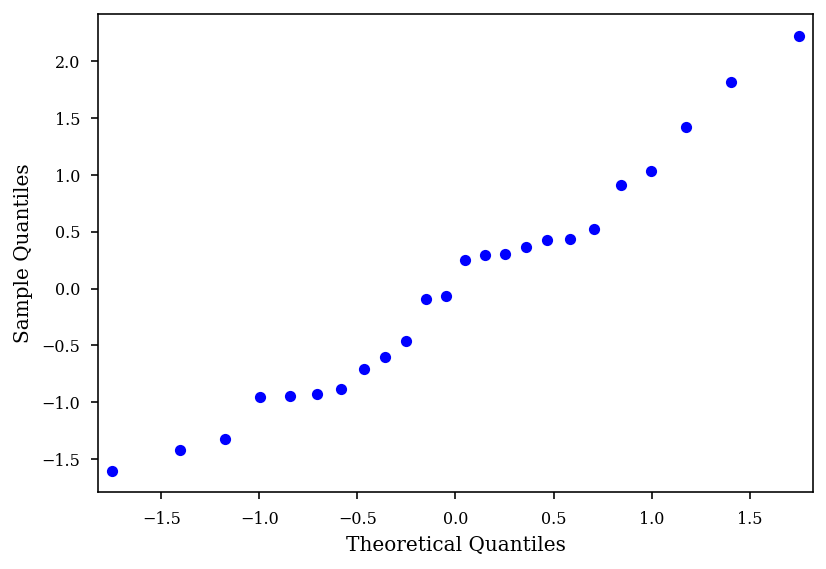

LeveneResult(statistic=0.07939800009078543, pvalue=0.7807484464721357)
KruskalResult(statistic=0.05333333333332746, pvalue=0.8173613313851867)
4039.4064673101548
3578.55566639844


<AxesSubplot:xlabel='group', ylabel='path_length'>

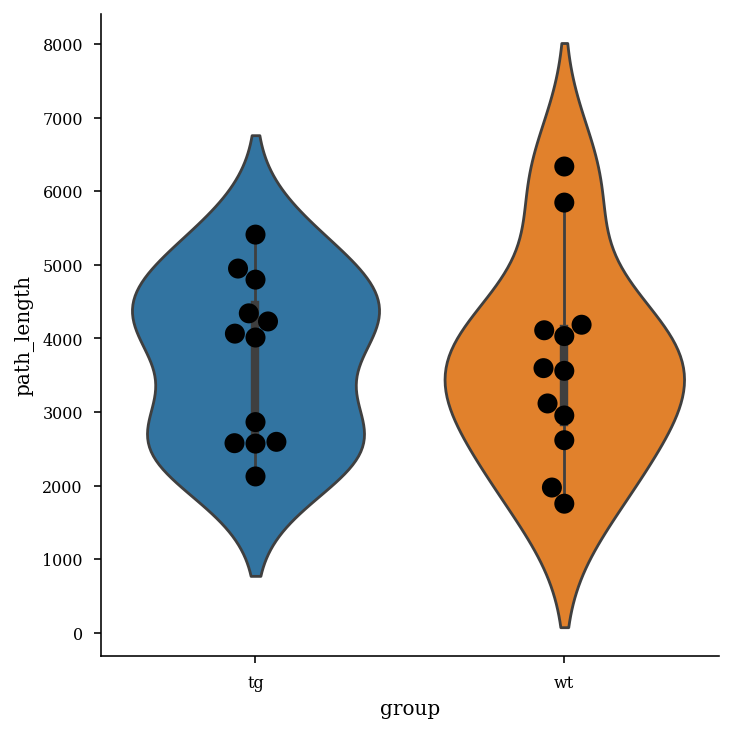

In [39]:
# PATH LENGTH 

# Gettin summary statistics
print(rp.summary_cont(df["path_length"]))

# Build ANOVA model 
ols_resid = sm.ols('path_length ~ group',data = df).fit()

# Test assumption of normality for residuals 
print(stats.shapiro(ols_resid.resid))

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
print(stats.levene(df['path_length'][df['group'] == 'tg'],
             df['path_length'][df['group'] == 'wt']))

# Given Residuals were not normally distributed, run a Kruskal-Wallis test 
print(stats.kruskal(df['path_length'][df['group'] == 'tg'],  df['path_length'][df['group'] == 'wt']))

# Provide median 
print(np.median((df['path_length'][df['group'] == 'tg'])))
print(np.median((df['path_length'][df['group'] == 'wt'])))


# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="path_length", kind="violin", data=df)
sns.swarmplot(x="group", y="path_length", color="k", size=10, data=df, ax=g.ax)

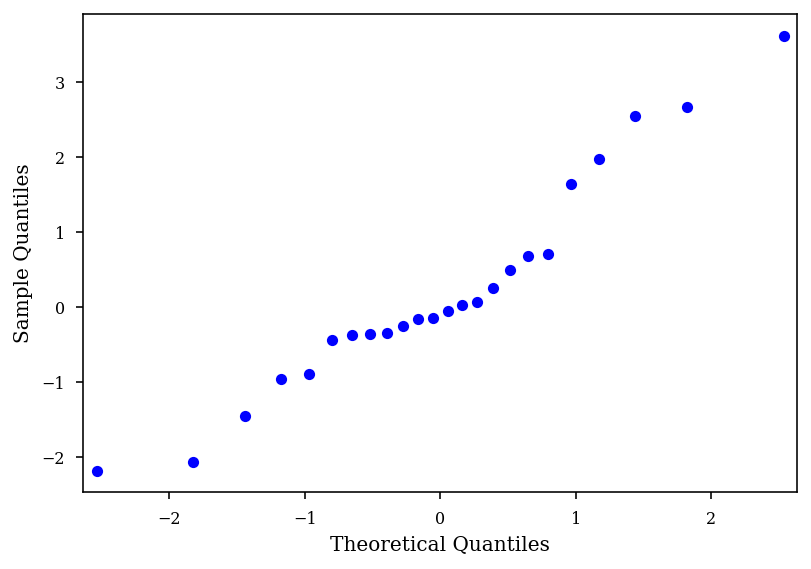

            df    sum_sq   mean_sq         F    PR(>F)
group      1.0  0.004546  0.004546  0.410633  0.528268
Residual  22.0  0.243537  0.011070       NaN       NaN


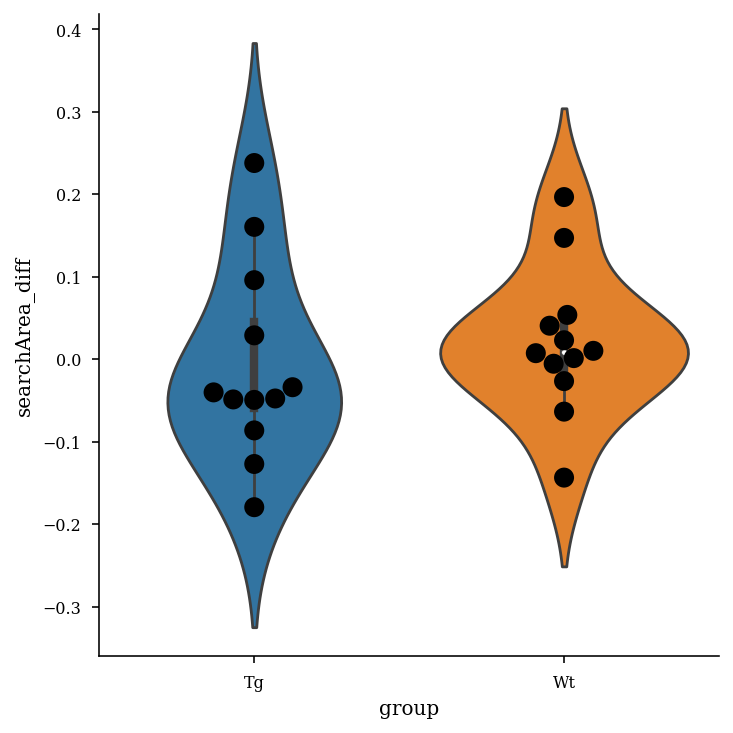

In [12]:
################ SEARCH AREA ##################################

# Gettin summary statistics
rp.summary_cont(df["searchArea_diff"])

# Build ANOVA model 
ols_resid = sm.ols('searchArea_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['searchArea_diff'][df['group'] == 'Tg'],
             df['searchArea_diff'][df['group'] == 'Wt'])

#ANOVA assumptions were met
table = smf.stats.anova_lm(ols_resid,typ = 1) # use type 1 sum of squares like equal sample size 
print(table)

np.mean((df['searchArea_diff'][df['group'] == 'Tg']))
np.mean((df['searchArea_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="searchArea_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="searchArea_diff", color="k", size=10, data=df, ax=g.ax);


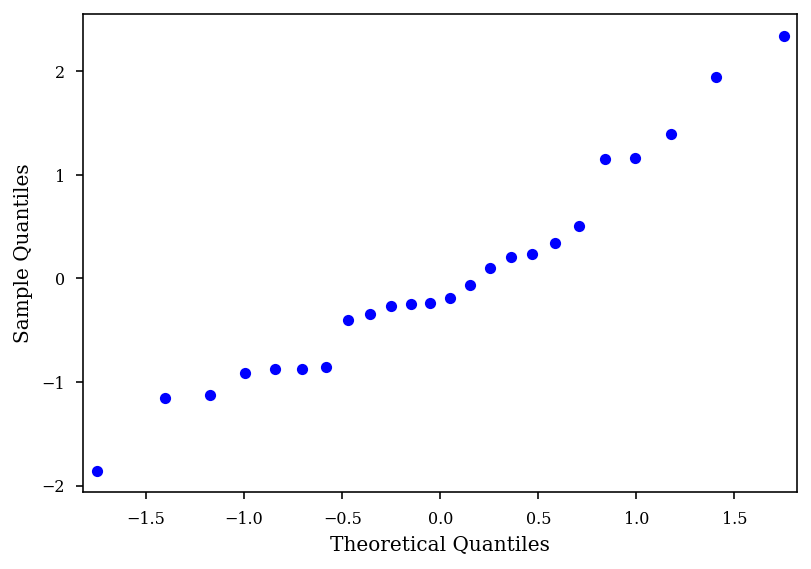

            df      sum_sq   mean_sq         F    PR(>F)
group      1.0    0.032311  0.032311  0.005837  0.939793
Residual  22.0  121.787002  5.535773       NaN       NaN


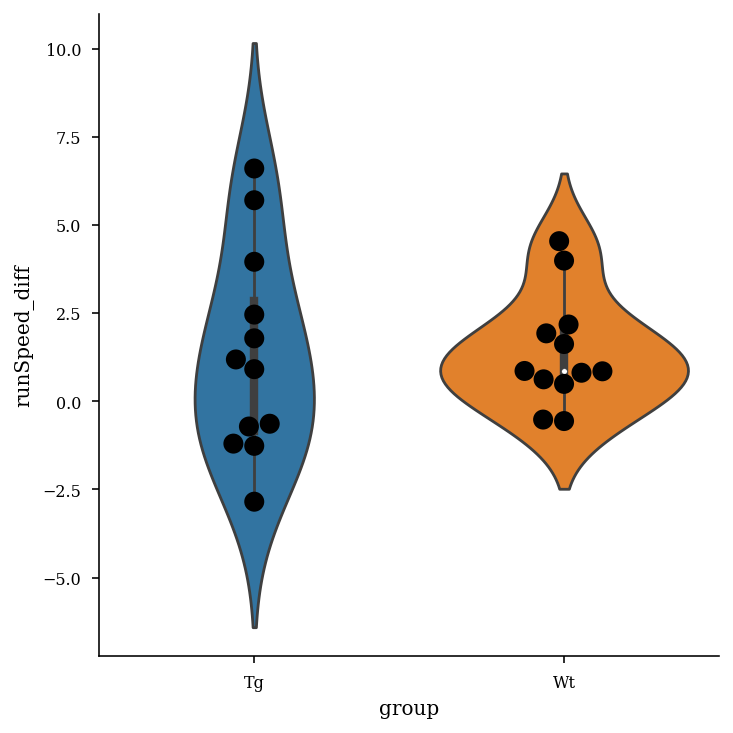

In [13]:
################ Running Speed ##################################

# Gettin summary statistics
rp.summary_cont(df["runSpeed_diff"])

# Build ANOVA model 
ols_resid = sm.ols('runSpeed_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['runSpeed_diff'][df['group'] == 'Tg'],
             df['runSpeed_diff'][df['group'] == 'Wt'])

#ANOVA assumptions were met
table = smf.stats.anova_lm(ols_resid,typ = 1) # use type 1 sum of squares like equal sample size 
print(table)

np.mean((df['runSpeed_diff'][df['group'] == 'Tg']))
np.mean((df['runSpeed_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="runSpeed_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="runSpeed_diff", color="k", size=10, data=df, ax=g.ax);

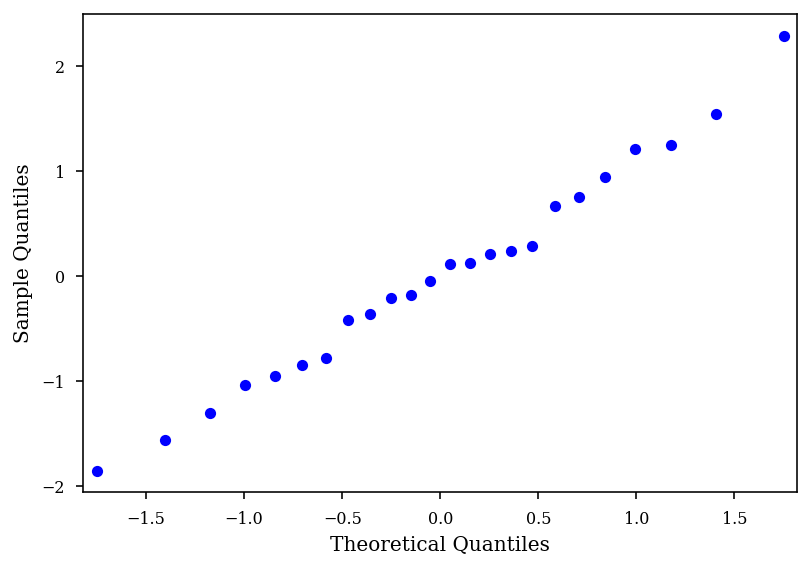

            df       sum_sq    mean_sq         F    PR(>F)
group      1.0    21.573601  21.573601  0.252532  0.620291
Residual  22.0  1879.443104  85.429232       NaN       NaN


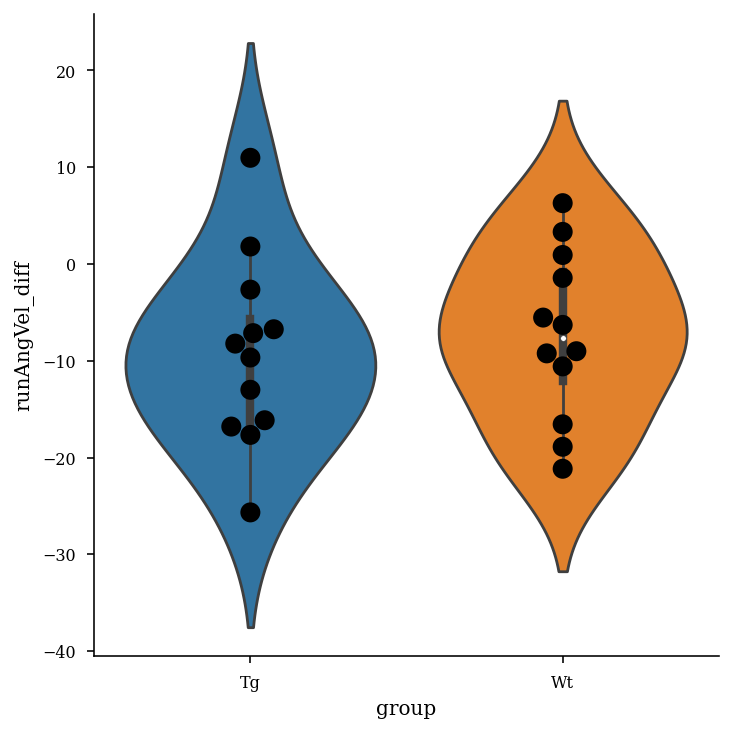

In [14]:
################ running Angular Velocity ##################################

# Gettin summary statistics
rp.summary_cont(df["runAngVel_diff"])

# Build ANOVA model 
ols_resid = sm.ols('runAngVel_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['runAngVel_diff'][df['group'] == 'Tg'],
             df['runAngVel_diff'][df['group'] == 'Wt'])

#ANOVA assumptions were met
table = smf.stats.anova_lm(ols_resid,typ = 1) # use type 1 sum of squares like equal sample size 
print(table)

np.mean((df['runAngVel_diff'][df['group'] == 'Tg']))
np.mean((df['runAngVel_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="runAngVel_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="runAngVel_diff", color="k", size=10, data=df, ax=g.ax);


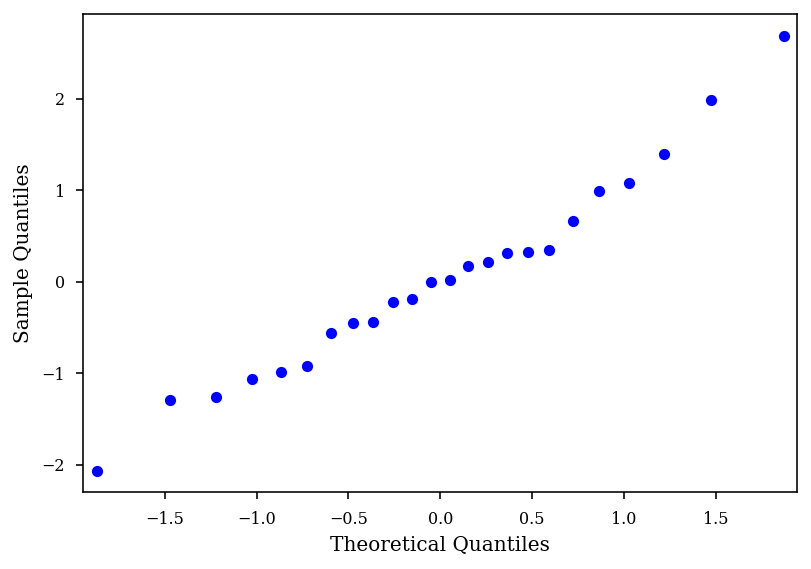

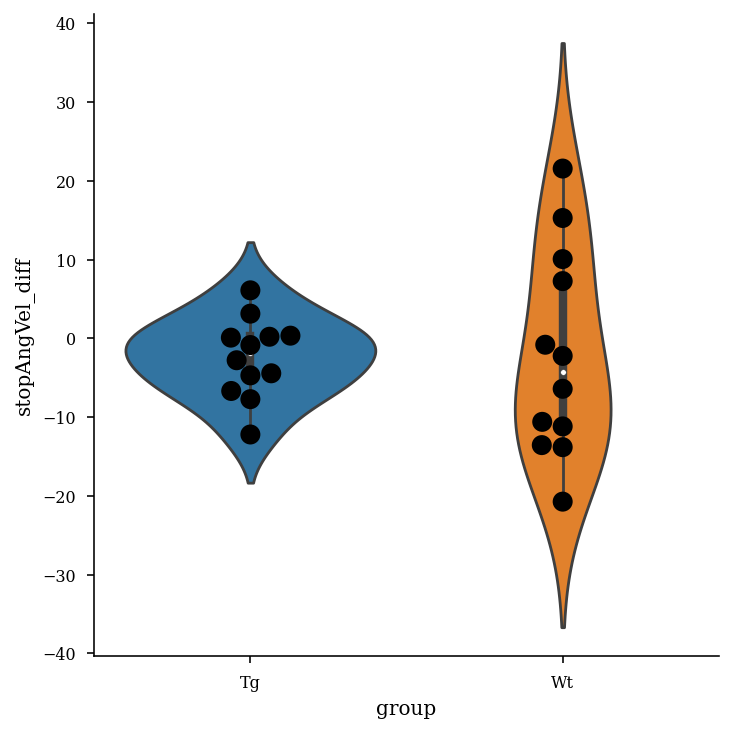

In [15]:
################ stop Angular Velocity ##################################

# Gettin summary statistics
rp.summary_cont(df["stopAngVel_diff"])

# Build ANOVA model 
ols_resid = sm.ols('stopAngVel_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['stopAngVel_diff'][df['group'] == 'Tg'],
             df['stopAngVel_diff'][df['group'] == 'Wt'])

# Given Homogeneity of variance was not met, run a Kruskal-Wallis test 
stats.kruskal(df['stopAngVel_diff'][df['group'] == 'Tg'],  df['stopAngVel_diff'][df['group'] == 'Wt'])

# Provide median 
np.median((df['stopAngVel_diff'][df['group'] == 'Tg']))
np.median((df['stopAngVel_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="stopAngVel_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="stopAngVel_diff", color="k", size=10, data=df, ax=g.ax);

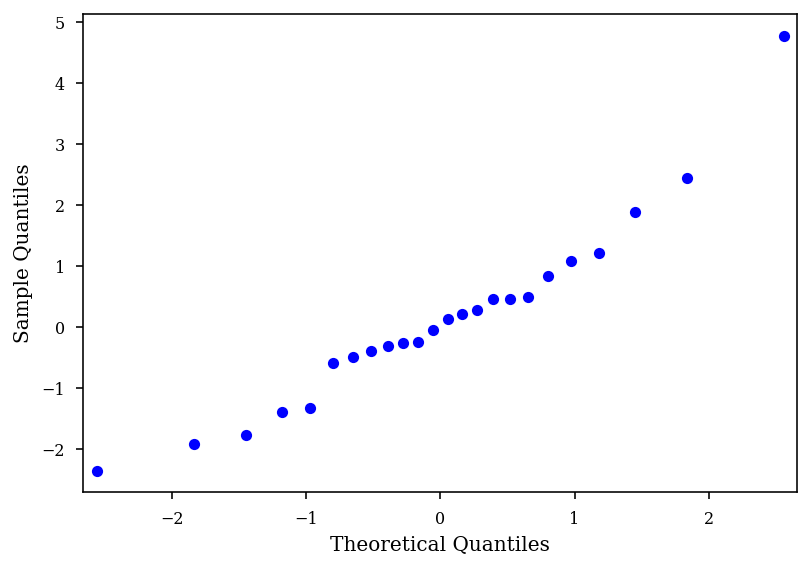

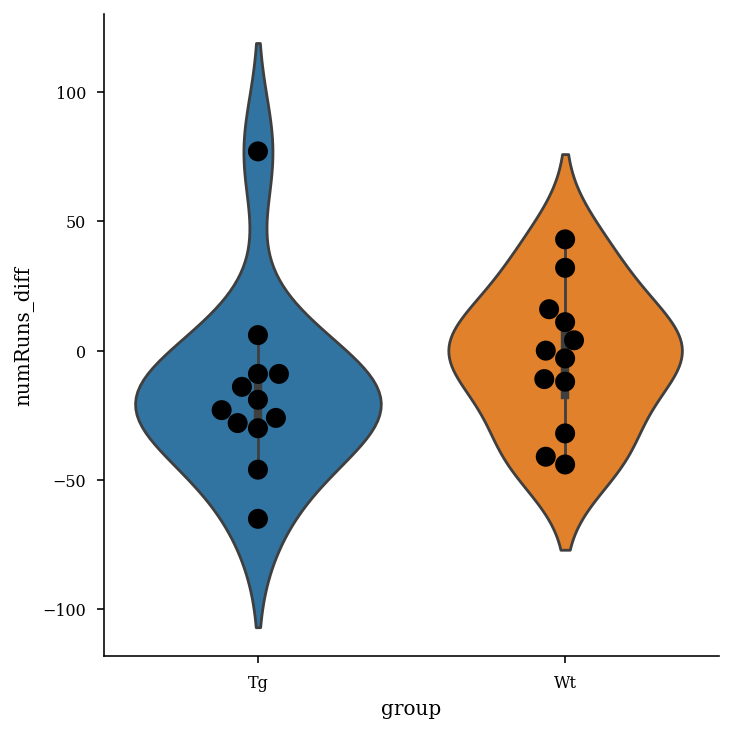

In [16]:
################ number of runs  ##################################

# Gettin summary statistics
rp.summary_cont(df["numRuns_diff"])

# Build ANOVA model 
ols_resid = sm.ols('numRuns_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['numRuns_diff'][df['group'] == 'Tg'],
             df['numRuns_diff'][df['group'] == 'Wt'])

# Given residuals were not normal, run a Kruskal-Wallis test 
stats.kruskal(df['numRuns_diff'][df['group'] == 'Tg'],  df['numRuns_diff'][df['group'] == 'Wt'])

# Provide median 
np.median((df['numRuns_diff'][df['group'] == 'Tg']))
np.median((df['numRuns_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="numRuns_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="numRuns_diff", color="k", size=10, data=df, ax=g.ax);

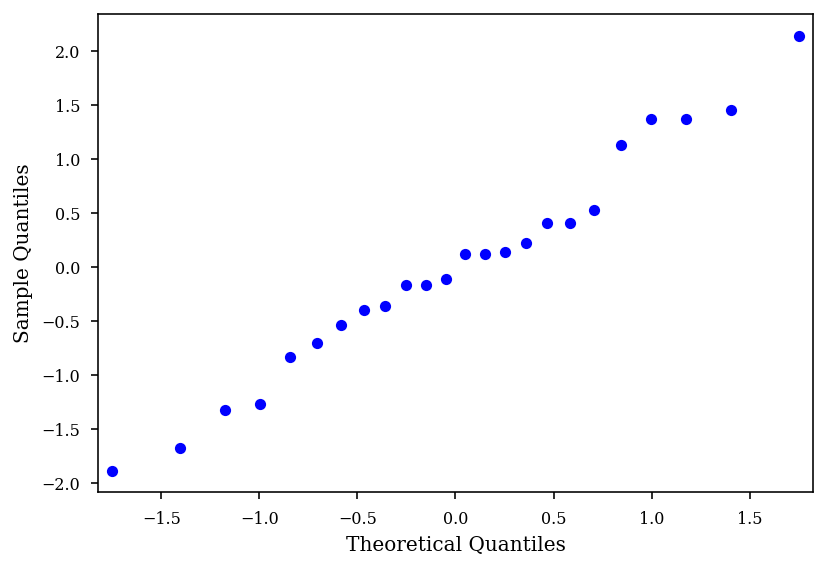

            df        sum_sq     mean_sq         F    PR(>F)
group      1.0    126.041667  126.041667  0.196416  0.661957
Residual  22.0  14117.583333  641.708333       NaN       NaN


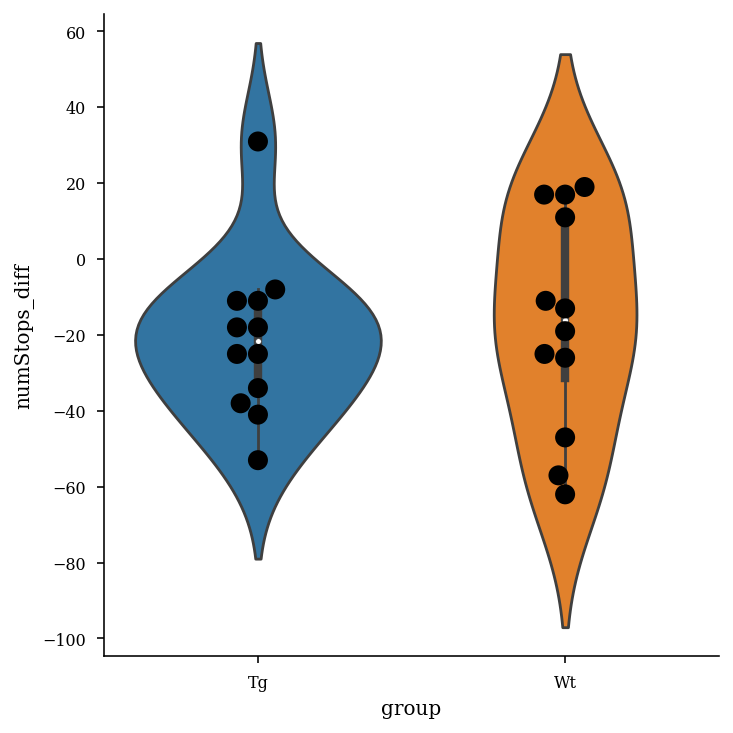

In [17]:
################ number of stops ##################################

# Gettin summary statistics
rp.summary_cont(df["numStops_diff"])

# Build ANOVA model 
ols_resid = sm.ols('numStops_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['numStops_diff'][df['group'] == 'Tg'],
             df['numStops_diff'][df['group'] == 'Wt'])

table = smf.stats.anova_lm(ols_resid,typ = 1) # use type 1 sum of squares like equal sample size 
print(table)

np.mean((df['numStops_diff'][df['group'] == 'Tg']))
np.mean((df['numStops_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="numStops_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="numStops_diff", color="k", size=10, data=df, ax=g.ax);

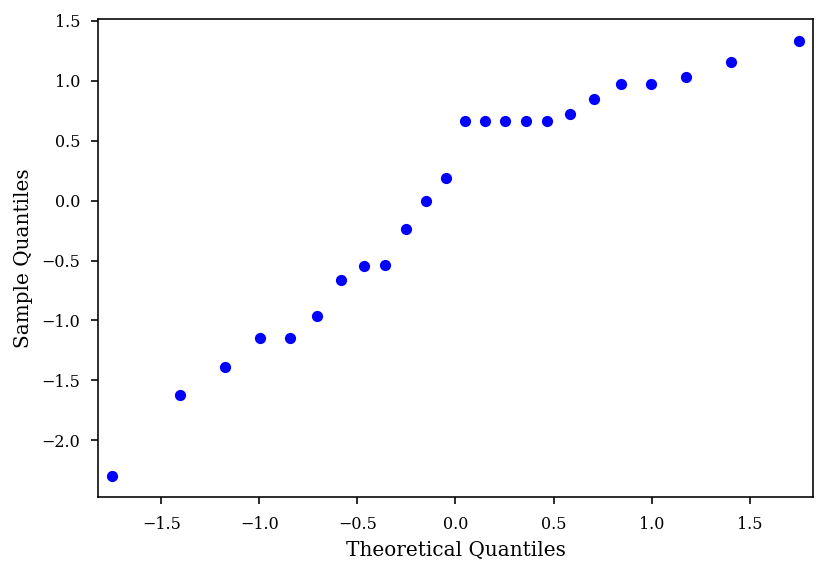

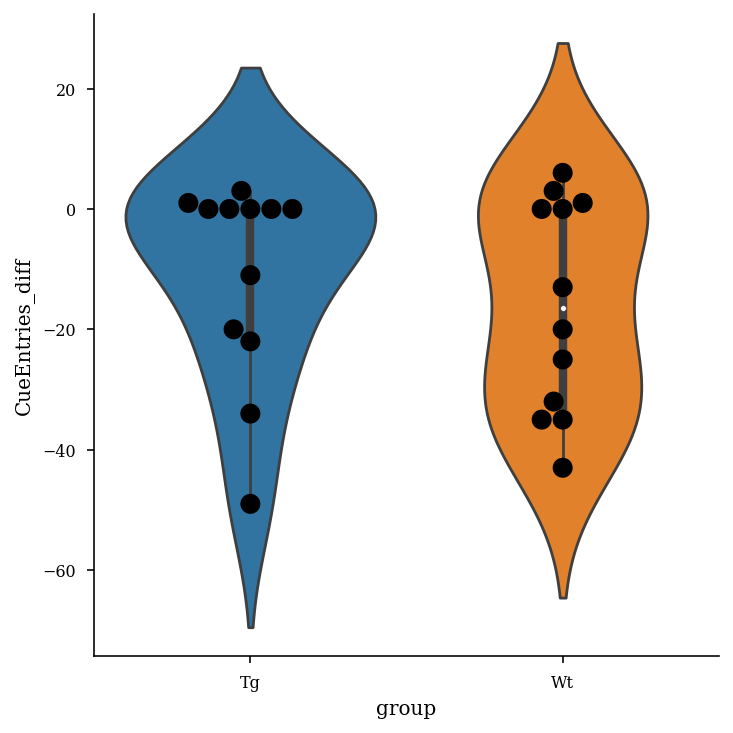

In [18]:
################ Cue Zone Entries ##################################

# Gettin summary statistics
rp.summary_cont(df["CueEntries_diff"])

# Build ANOVA model 
ols_resid = sm.ols('CueEntries_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['CueEntries_diff'][df['group'] == 'Tg'],
             df['CueEntries_diff'][df['group'] == 'Wt'])

# Given residuals were not normal, run a Kruskal-Wallis test 
stats.kruskal(df['CueEntries_diff'][df['group'] == 'Tg'],  df['CueEntries_diff'][df['group'] == 'Wt'])

# Provide median 
np.median((df['CueEntries_diff'][df['group'] == 'Tg']))
np.median((df['CueEntries_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="CueEntries_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="CueEntries_diff", color="k", size=10, data=df, ax=g.ax);

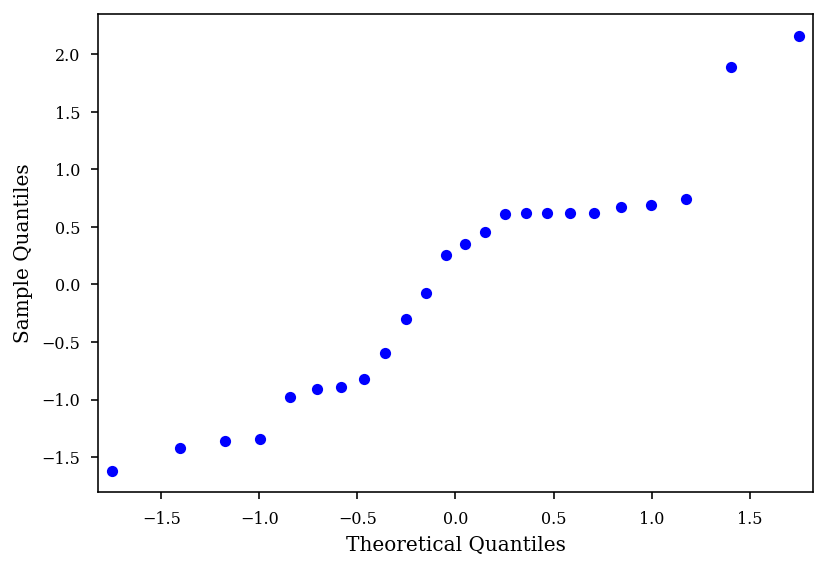

            df        sum_sq        mean_sq         F    PR(>F)
group      1.0  1.025894e+04   10258.935000  0.017591  0.895692
Residual  22.0  1.283053e+07  583205.963729       NaN       NaN


-493.2805555555554

In [19]:
################ Cue Zone Dwell ##################################

# Gettin summary statistics
rp.summary_cont(df["cue_dwell_diff"])

# Build ANOVA model 
ols_resid = sm.ols('cue_dwell_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['cue_dwell_diff'][df['group'] == 'Tg'],
             df['cue_dwell_diff'][df['group'] == 'Wt'])

table = smf.stats.anova_lm(ols_resid,typ = 1) # use type 1 sum of squares like equal sample size 
print(table)

np.mean((df['cue_dwell_diff'][df['group'] == 'Tg']))
np.mean((df['cue_dwell_diff'][df['group'] == 'Wt']))

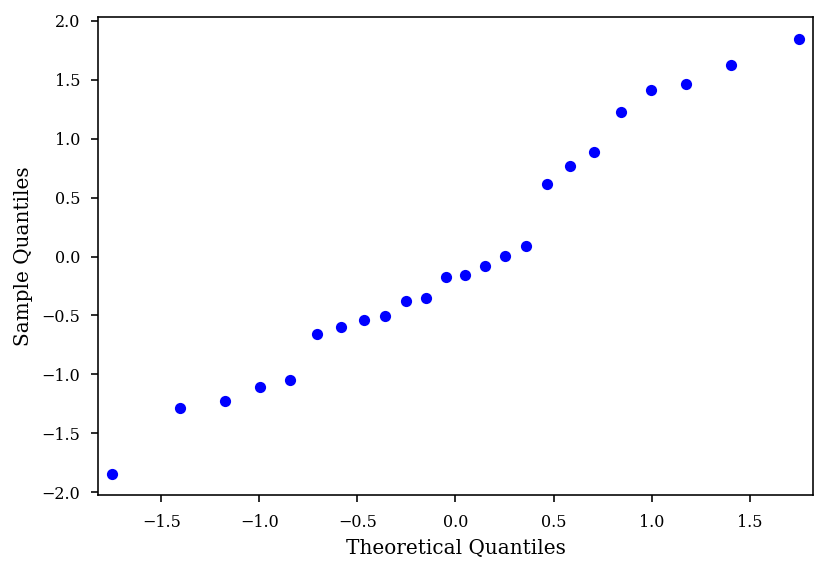

            df      sum_sq   mean_sq         F   PR(>F)
group      1.0    1.835890  1.835890  0.208373  0.65252
Residual  22.0  193.832695  8.810577       NaN      NaN


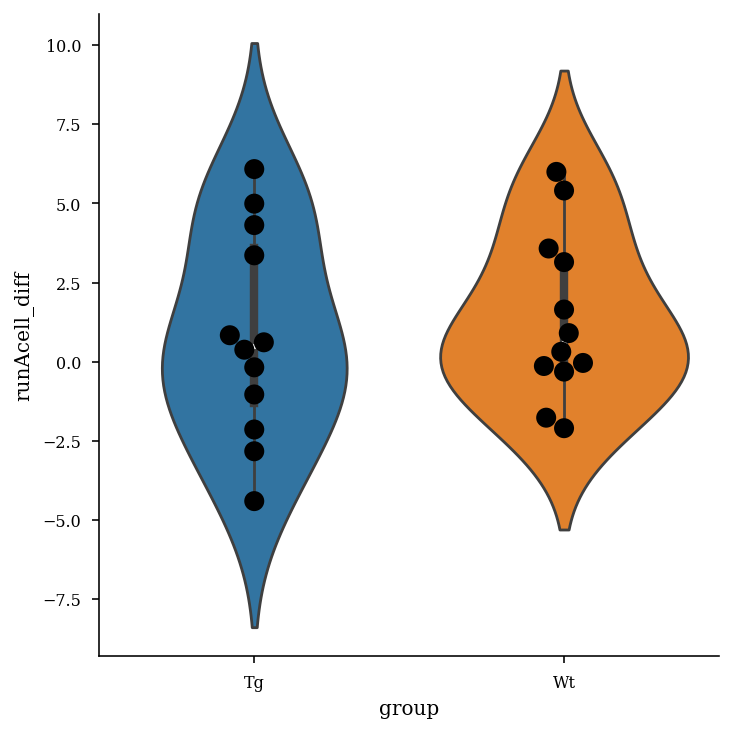

In [21]:
################ run Acceleration  ##################################

# Gettin summary statistics
rp.summary_cont(df["runAcell_diff"])

# Build ANOVA model 
ols_resid = sm.ols('runAcell_diff ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['runAcell_diff'][df['group'] == 'Tg'],
             df['runAcell_diff'][df['group'] == 'Wt'])

table = smf.stats.anova_lm(ols_resid,typ = 1) # use type 1 sum of squares like equal sample size 
print(table)

# Provide median 
np.mean((df['runAcell_diff'][df['group'] == 'Tg']))
np.mean((df['runAcell_diff'][df['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="runAcell_diff", kind="violin", data=df)
sns.swarmplot(x="group", y="runAcell_diff", color="k", size=10, data=df, ax=g.ax);



In [23]:
# Loading data
df = pd.read_csv(data_path + 'wholeTrial_measures.csv')

# df = pd.read_csv(r"D:\Users\BClarkLab\Google Drive (lberkowitz@unm.edu)\Manuscripts\In Progress\TgF344-AD_OF\Data\wholeTrial_measures.csv")
df_day2 = df[df['day']=='D2']

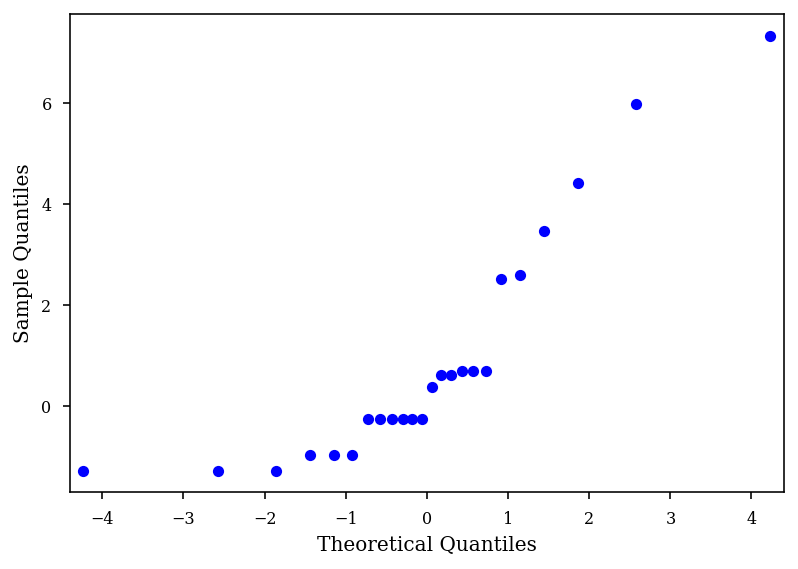

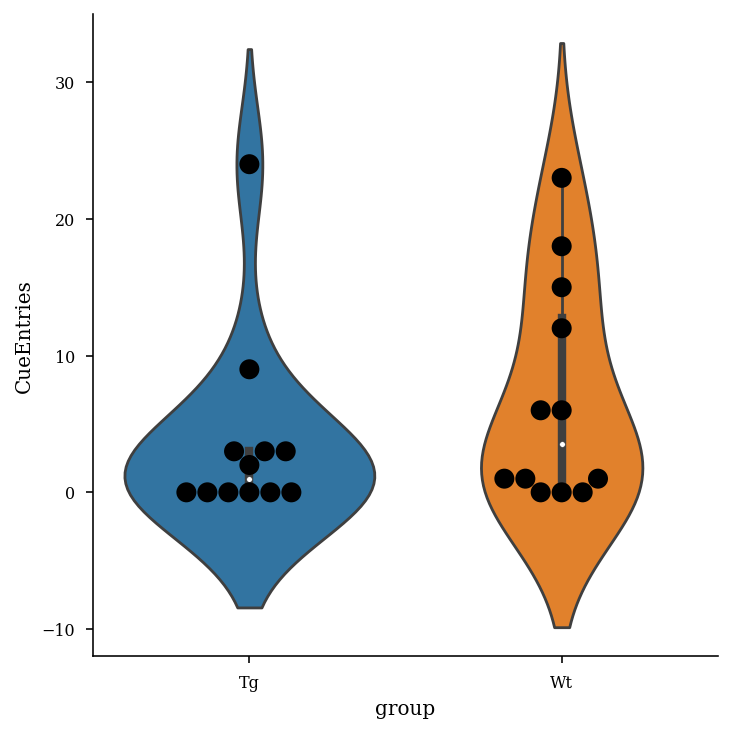

In [24]:
######################## Total Cue Entries Day 2 #############################
# Gettin summary statistics
rp.summary_cont(df_day2["CueEntries"])

# Build ANOVA model 
ols_resid = sm.ols('CueEntries ~ group',data = df_day2).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df_day2['CueEntries'][df_day2['group'] == 'Tg'],
             df_day2['CueEntries'][df_day2['group'] == 'Wt'])

# Given residuals were not normal, run a Kruskal-Wallis test 
stats.kruskal(df_day2['CueEntries'][df_day2['group'] == 'Tg'],  df_day2['CueEntries'][df_day2['group'] == 'Wt'])

# Provide median 
np.median((df_day2['CueEntries'][df_day2['group'] == 'Tg']))
np.median((df_day2['CueEntries'][df_day2['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="CueEntries", kind="violin", data=df_day2)
sns.swarmplot(x="group", y="CueEntries", color="k", size=10, data=df_day2, ax=g.ax);



In [25]:
df = pd.read_csv(data_path + 'wholeTrial_measures.csv')

# df = pd.read_csv(r"D:\Users\BClarkLab\Google Drive (lberkowitz@unm.edu)\Manuscripts\In Progress\TgF344-AD_OF\Data\wholeTrial_measures.csv")
df_day2 = df[df['day']=='D2']

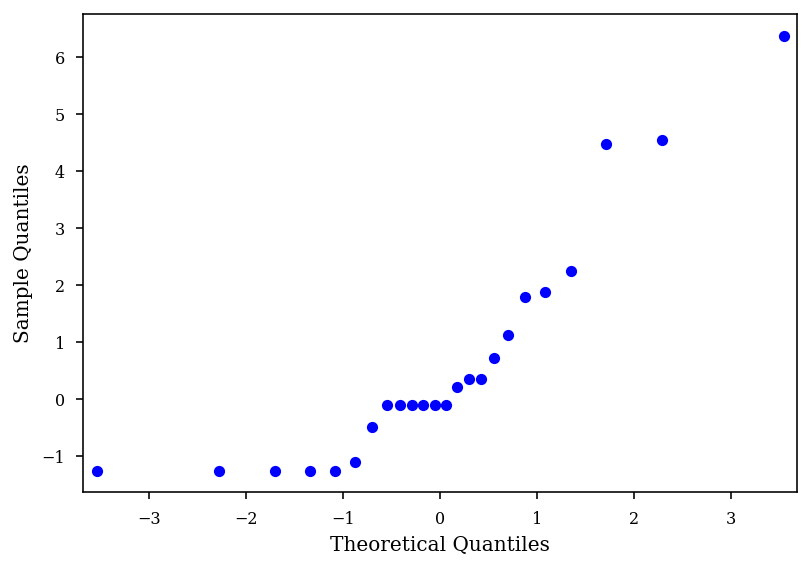

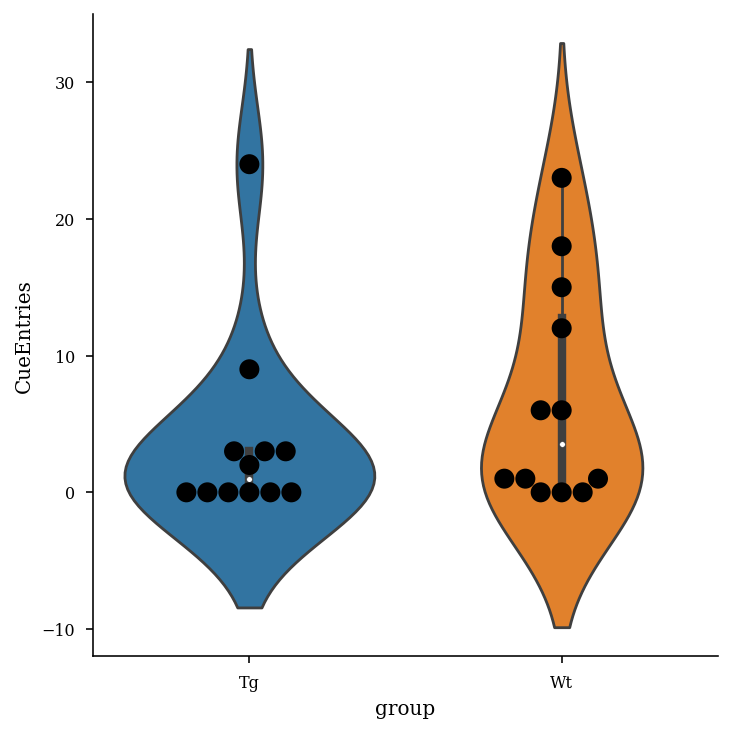

In [26]:
###### Cue Stops day 2

# Gettin summary statistics
rp.summary_cont(df_day2["CueStops"])

# Build ANOVA model 
ols_resid = sm.ols('CueStops ~ group',data = df_day2).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df_day2['CueStops'][df_day2['group'] == 'Tg'],
             df_day2['CueStops'][df_day2['group'] == 'Wt'])

# Given residuals were not normal, run a Kruskal-Wallis test 
stats.kruskal(df_day2['CueStops'][df_day2['group'] == 'Tg'],  df_day2['CueStops'][df_day2['group'] == 'Wt'])

# Provide median 
np.median((df_day2['CueStops'][df_day2['group'] == 'Tg']))
np.median((df_day2['CueStops'][df_day2['group'] == 'Wt']))

# Plot data 
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="CueEntries", kind="violin", data=df_day2)
sns.swarmplot(x="group", y="CueEntries", color="k", size=10, data=df_day2, ax=g.ax);


In [27]:
###### Primary HB dist
df = pd.read_csv(data_path + 'HBdist.csv')

# df = pd.read_csv(r"D:\Users\BClarkLab\Google Drive (lberkowitz@unm.edu)\Manuscripts\In Progress\TgF344-AD_OF\Data\HBdist.csv")


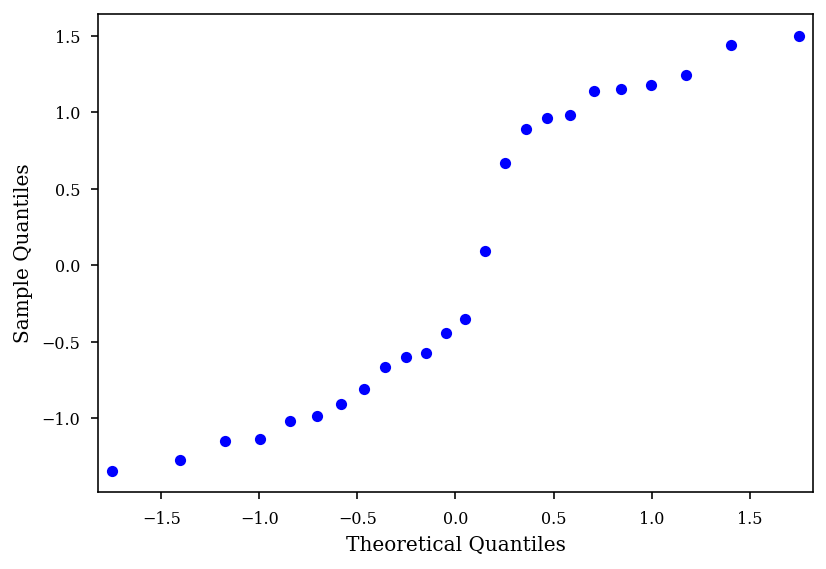

116.28839582982516

In [28]:

# Gettin summary statistics
rp.summary_cont(df["primaryHBdist"])

# Build ANOVA model 
ols_resid = sm.ols('primaryHBdist ~ group',data = df).fit()

# Test assumption of normality for residuals 
stats.shapiro(ols_resid.resid)

# Plot q-q for good measure 
import statsmodels.api as smf
fig = smf.qqplot(ols_resid.resid, stats.t,fit=True, distargs=(1,))
plt.show()

# Test homogeneity of Variance test
stats.levene(df['primaryHBdist'][df['group'] == 'Tg'],
             df['primaryHBdist'][df['group'] == 'Wt'])

# Given residuals were not normal, run a Kruskal-Wallis test 
stats.kruskal(df['primaryHBdist'][df['group'] == 'Tg'],  df['primaryHBdist'][df['group'] == 'Wt'])

# Provide median 
np.median((df['primaryHBdist'][df['group'] == 'Tg']))
np.median((df['primaryHBdist'][df['group'] == 'Wt']))